In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random, jit, partial
from sgmcmcjax.samplers import build_sgld_sampler
 

# Gaussian posterior

Assume data comes from a Gaussian with unknown mean and identity covariance, and estimate the mean

In [8]:

# define model in JAX
def loglikelihood(theta, x):
    return -0.5*jnp.dot(x-theta, x-theta)
 
def logprior(theta):
    return -0.5*jnp.dot(theta, theta)*0.01


In [9]:
# generate dataset
N, D = 10000, 100
key = random.PRNGKey(0)
X_data = random.normal(key, shape=(N, D))

In [24]:
# build sampler
batch_size = int(0.1*N)
dt = 1e-5
my_sampler = build_sgld_sampler(dt, loglikelihood, logprior, (X_data,), batch_size)

# jit the sampler
my_sampler = partial(jit, static_argnums=(1,))(my_sampler)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 835 ms, sys: 14.2 ms, total: 850 ms
Wall time: 1.02 s


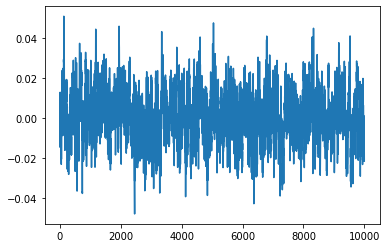

In [29]:
%%time

# run sampler
Nsamples = 10000
samples = my_sampler(key, Nsamples, jnp.zeros(D))

idx = 0
plt.plot(samples[:, idx])
